In [133]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

In [134]:
flight_data = pd.read_csv('./dataset/merged_data/latter_flight_data.csv')
flight_data['SCH_ARR_TIME'] = pd.to_datetime(flight_data['SCH_ARR_TIME'])
flight_data['SCH_DEP_TIME'] = pd.to_datetime(flight_data['SCH_DEP_TIME'])

flight_data['MONTH'] = flight_data['SCH_ARR_TIME'].dt.month
flight_data['DAY'] = flight_data['SCH_ARR_TIME'].dt.day
flight_data['DEP_MINUTES'] = flight_data['SCH_DEP_TIME'].dt.hour * 60 + flight_data['SCH_DEP_TIME'].dt.minute
flight_data['ARR_MINUTES'] = flight_data['SCH_ARR_TIME'].dt.hour * 60 + flight_data['SCH_ARR_TIME'].dt.minute

flight_data.drop(columns=['SCH_DEP_TIME', 'SCH_ARR_TIME'], inplace=True)

flight_data.head()

flight_data.dtypes



,DAY_OF_WEEK,MKT_UNIQUE_CARRIER,OP_UNIQUE_CARRIER,ORIGIN,ARR_DELAY,ORGIN_WTH_temp,ORGIN_WTH_precip,ORGIN_WTH_precipprob,ORGIN_WTH_snow,ORGIN_WTH_windspeed,ORGIN_WTH_winddir,ORGIN_WTH_cloudcover,ORGIN_WTH_visibility,ORGIN_WTH_severerisk,DEST_WTH_temp,DEST_WTH_precip,DEST_WTH_precipprob,DEST_WTH_snow,DEST_WTH_windspeed,DEST_WTH_winddir,DEST_WTH_cloudcover,DEST_WTH_visibility,DEST_WTH_severerisk,FORMER_FLIGHT_STATUS,MONTH,DAY,DEP_MINUTES,ARR_MINUTES
0,6,WN,WN,MCO,-26.00,74.00,0.00,0,0.00,6.90,200.00,2.90,9.90,3.00,48.00,0.00,0,0.00,3.60,8.00,100.00,9.80,3.00,NaN,1,1,630,800
1,6,UA,OO,ORD,-25.00,36.10,0.00,0,0.02,21.00,20.00,100.00,9.90,3.00,47.90,0.00,0,0.00,0.40,358.00,100.00,9.70,3.00,NaN,1,1,640,812
2,6,B6,B6,MCO,22.00,83.00,0.00,0,0.00,9.90,199.00,4.30,9.90,3.00,47.70,0.00,0,0.00,7.90,311.00,100.00,7.80,3.00,early,1,1,793,956
3,6,B6,B6,JFK,36.00,52.80,0.15,100,0.00,8.10,40.00,100.00,2.20,3.00,37.90,0.02,100,0.00,6.10,303.00,100.00,6.80,3.00,NaN,1,1,1305,1379
4,7,B6,B6,JFK,-12.00,52.10,0.00,0,0.00,0.00,0.00,100.00,5.90,3.00,25.00,0.00,0,0.01,13.80,303.00,100.00,1.20,3.00,NaN,1,2,509,590


DAY_OF_WEEK               int64
MKT_UNIQUE_CARRIER       object
OP_UNIQUE_CARRIER        object
ORIGIN                   object
ARR_DELAY               float64
ORGIN_WTH_temp          float64
ORGIN_WTH_precip        float64
ORGIN_WTH_precipprob      int64
ORGIN_WTH_snow          float64
ORGIN_WTH_windspeed     float64
ORGIN_WTH_winddir       float64
ORGIN_WTH_cloudcover    float64
ORGIN_WTH_visibility    float64
ORGIN_WTH_severerisk    float64
DEST_WTH_temp           float64
DEST_WTH_precip         float64
DEST_WTH_precipprob       int64
DEST_WTH_snow           float64
DEST_WTH_windspeed      float64
DEST_WTH_winddir        float64
DEST_WTH_cloudcover     float64
DEST_WTH_visibility     float64
DEST_WTH_severerisk     float64
FORMER_FLIGHT_STATUS     object
MONTH                     int32
DAY                       int32
DEP_MINUTES               int32
ARR_MINUTES               int32
dtype: object

In [135]:
categorical_vars = {}
# For categorical variables if we are considering variables which were coded to integers, but are actually catagorical.
if True:
    for col in flight_data.columns:
        unique_col_vals = flight_data[col].unique()
        if(len(unique_col_vals) < 15):
            categorical_vars[col] = unique_col_vals
categorical_vars

{'DAY_OF_WEEK': array([6, 7, 1, 2, 3, 4, 5]),
 'MKT_UNIQUE_CARRIER': array(['WN', 'UA', 'B6', 'AA', 'DL'], dtype=object),
 'OP_UNIQUE_CARRIER': array(['WN', 'OO', 'B6', 'MQ', '9E', 'G7', 'PT', 'YX', 'UA', 'ZW'],
       dtype=object),
 'ORIGIN': array(['MCO', 'ORD', 'JFK'], dtype=object),
 'ORGIN_WTH_precipprob': array([  0, 100]),
 'ORGIN_WTH_severerisk': array([  3.,  10.,  30.,  60.,   5.,  75.,  15.,   8., 100.,  50.,  19.,
         25.,  38.]),
 'DEST_WTH_precipprob': array([  0, 100]),
 'DEST_WTH_severerisk': array([  3.,  10.,  30.,  60.,   5.,  75., 100.,   8.,  15.]),
 'FORMER_FLIGHT_STATUS': array([nan, 'early', 'late', 'on-time'], dtype=object),
 'MONTH': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)}

In [136]:
if True:
    flight_data.isna().sum()
    flight_data.dropna(subset=['FORMER_FLIGHT_STATUS'], inplace=True)
    flight_data.isna().sum()
    flight_data.shape

DAY_OF_WEEK                0
MKT_UNIQUE_CARRIER         0
OP_UNIQUE_CARRIER          0
ORIGIN                     0
ARR_DELAY                  0
ORGIN_WTH_temp             0
ORGIN_WTH_precip           0
ORGIN_WTH_precipprob       0
ORGIN_WTH_snow             0
ORGIN_WTH_windspeed        0
ORGIN_WTH_winddir          0
ORGIN_WTH_cloudcover       0
ORGIN_WTH_visibility       0
ORGIN_WTH_severerisk       0
DEST_WTH_temp              0
DEST_WTH_precip            0
DEST_WTH_precipprob        0
DEST_WTH_snow              0
DEST_WTH_windspeed         0
DEST_WTH_winddir           0
DEST_WTH_cloudcover        0
DEST_WTH_visibility        0
DEST_WTH_severerisk        0
FORMER_FLIGHT_STATUS    2041
MONTH                      0
DAY                        0
DEP_MINUTES                0
ARR_MINUTES                0
dtype: int64

DAY_OF_WEEK             0
MKT_UNIQUE_CARRIER      0
OP_UNIQUE_CARRIER       0
ORIGIN                  0
ARR_DELAY               0
ORGIN_WTH_temp          0
ORGIN_WTH_precip        0
ORGIN_WTH_precipprob    0
ORGIN_WTH_snow          0
ORGIN_WTH_windspeed     0
ORGIN_WTH_winddir       0
ORGIN_WTH_cloudcover    0
ORGIN_WTH_visibility    0
ORGIN_WTH_severerisk    0
DEST_WTH_temp           0
DEST_WTH_precip         0
DEST_WTH_precipprob     0
DEST_WTH_snow           0
DEST_WTH_windspeed      0
DEST_WTH_winddir        0
DEST_WTH_cloudcover     0
DEST_WTH_visibility     0
DEST_WTH_severerisk     0
FORMER_FLIGHT_STATUS    0
MONTH                   0
DAY                     0
DEP_MINUTES             0
ARR_MINUTES             0
dtype: int64

(4732, 28)

In [137]:
flight_data_encoded = pd.get_dummies(flight_data, columns = list(categorical_vars.keys()), drop_first = True)
flight_data_encoded.columns
flight_data_encoded.shape

Index(['ARR_DELAY', 'ORGIN_WTH_temp', 'ORGIN_WTH_precip', 'ORGIN_WTH_snow',
       'ORGIN_WTH_windspeed', 'ORGIN_WTH_winddir', 'ORGIN_WTH_cloudcover',
       'ORGIN_WTH_visibility', 'DEST_WTH_temp', 'DEST_WTH_precip',
       'DEST_WTH_snow', 'DEST_WTH_windspeed', 'DEST_WTH_winddir',
       'DEST_WTH_cloudcover', 'DEST_WTH_visibility', 'DAY', 'DEP_MINUTES',
       'ARR_MINUTES', 'DAY_OF_WEEK_2', 'DAY_OF_WEEK_3', 'DAY_OF_WEEK_4',
       'DAY_OF_WEEK_5', 'DAY_OF_WEEK_6', 'DAY_OF_WEEK_7',
       'MKT_UNIQUE_CARRIER_B6', 'MKT_UNIQUE_CARRIER_DL',
       'MKT_UNIQUE_CARRIER_UA', 'MKT_UNIQUE_CARRIER_WN',
       'OP_UNIQUE_CARRIER_B6', 'OP_UNIQUE_CARRIER_G7', 'OP_UNIQUE_CARRIER_MQ',
       'OP_UNIQUE_CARRIER_OO', 'OP_UNIQUE_CARRIER_PT', 'OP_UNIQUE_CARRIER_UA',
       'OP_UNIQUE_CARRIER_WN', 'OP_UNIQUE_CARRIER_YX', 'OP_UNIQUE_CARRIER_ZW',
       'ORIGIN_MCO', 'ORIGIN_ORD', 'ORGIN_WTH_precipprob_100',
       'ORGIN_WTH_severerisk_5.0', 'ORGIN_WTH_severerisk_8.0',
       'ORGIN_WTH_severerisk_10.0

(4732, 73)

In [138]:
X_train, X_test, y_train, y_test = train_test_split(flight_data_encoded.drop(columns = ['ARR_DELAY']), flight_data_encoded['ARR_DELAY'], test_size=0.20, random_state = 35)

X_train.head()
X_test.head()
y_train.head()
y_test.head()


,ORGIN_WTH_temp,ORGIN_WTH_precip,ORGIN_WTH_snow,ORGIN_WTH_windspeed,ORGIN_WTH_winddir,ORGIN_WTH_cloudcover,ORGIN_WTH_visibility,DEST_WTH_temp,DEST_WTH_precip,DEST_WTH_snow,DEST_WTH_windspeed,DEST_WTH_winddir,DEST_WTH_cloudcover,DEST_WTH_visibility,DAY,DEP_MINUTES,ARR_MINUTES,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,MKT_UNIQUE_CARRIER_B6,MKT_UNIQUE_CARRIER_DL,MKT_UNIQUE_CARRIER_UA,MKT_UNIQUE_CARRIER_WN,OP_UNIQUE_CARRIER_B6,OP_UNIQUE_CARRIER_G7,OP_UNIQUE_CARRIER_MQ,OP_UNIQUE_CARRIER_OO,OP_UNIQUE_CARRIER_PT,OP_UNIQUE_CARRIER_UA,OP_UNIQUE_CARRIER_WN,OP_UNIQUE_CARRIER_YX,OP_UNIQUE_CARRIER_ZW,ORIGIN_MCO,ORIGIN_ORD,ORGIN_WTH_precipprob_100,ORGIN_WTH_severerisk_5.0,ORGIN_WTH_severerisk_8.0,ORGIN_WTH_severerisk_10.0,ORGIN_WTH_severerisk_15.0,ORGIN_WTH_severerisk_19.0,ORGIN_WTH_severerisk_25.0,ORGIN_WTH_severerisk_30.0,ORGIN_WTH_severerisk_38.0,ORGIN_WTH_severerisk_50.0,ORGIN_WTH_severerisk_60.0,ORGIN_WTH_severerisk_75.0,ORGIN_WTH_severerisk_100.0,DEST_WTH_precipprob_100,DEST_WTH_severerisk_5.0,DEST_WTH_severerisk_8.0,DEST_WTH_severerisk_10.0,DEST_WTH_severerisk_30.0,DEST_WTH_severerisk_60.0,DEST_WTH_severerisk_75.0,DEST_WTH_severerisk_100.0,FORMER_FLIGHT_STATUS_late,FORMER_FLIGHT_STATUS_on-time,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
1460,77.50,0.00,0.00,13.90,290.00,47.30,9.90,63.00,0.00,0.00,20.50,280.00,89.60,9.90,9,910,1081,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3395,39.80,0.00,0.00,1.60,27.00,23.80,9.90,26.90,0.00,0.00,4.60,70.00,48.30,9.90,8,980,1068,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4434,52.00,0.00,0.00,16.50,295.00,90.30,9.90,49.90,0.00,0.00,0.50,355.00,86.70,9.90,24,827,996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
5136,75.80,0.00,0.00,8.40,140.00,78.40,9.90,67.80,0.00,0.00,0.00,1.00,26.90,9.90,13,1116,1292,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False
5504,83.10,0.00,0.00,9.60,252.00,24.20,7.80,66.80,0.00,0.00,13.60,140.00,100.00,8.80,24,495,667,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False


,ORGIN_WTH_temp,ORGIN_WTH_precip,ORGIN_WTH_snow,ORGIN_WTH_windspeed,ORGIN_WTH_winddir,ORGIN_WTH_cloudcover,ORGIN_WTH_visibility,DEST_WTH_temp,DEST_WTH_precip,DEST_WTH_snow,DEST_WTH_windspeed,DEST_WTH_winddir,DEST_WTH_cloudcover,DEST_WTH_visibility,DAY,DEP_MINUTES,ARR_MINUTES,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,MKT_UNIQUE_CARRIER_B6,MKT_UNIQUE_CARRIER_DL,MKT_UNIQUE_CARRIER_UA,MKT_UNIQUE_CARRIER_WN,OP_UNIQUE_CARRIER_B6,OP_UNIQUE_CARRIER_G7,OP_UNIQUE_CARRIER_MQ,OP_UNIQUE_CARRIER_OO,OP_UNIQUE_CARRIER_PT,OP_UNIQUE_CARRIER_UA,OP_UNIQUE_CARRIER_WN,OP_UNIQUE_CARRIER_YX,OP_UNIQUE_CARRIER_ZW,ORIGIN_MCO,ORIGIN_ORD,ORGIN_WTH_precipprob_100,ORGIN_WTH_severerisk_5.0,ORGIN_WTH_severerisk_8.0,ORGIN_WTH_severerisk_10.0,ORGIN_WTH_severerisk_15.0,ORGIN_WTH_severerisk_19.0,ORGIN_WTH_severerisk_25.0,ORGIN_WTH_severerisk_30.0,ORGIN_WTH_severerisk_38.0,ORGIN_WTH_severerisk_50.0,ORGIN_WTH_severerisk_60.0,ORGIN_WTH_severerisk_75.0,ORGIN_WTH_severerisk_100.0,DEST_WTH_precipprob_100,DEST_WTH_severerisk_5.0,DEST_WTH_severerisk_8.0,DEST_WTH_severerisk_10.0,DEST_WTH_severerisk_30.0,DEST_WTH_severerisk_60.0,DEST_WTH_severerisk_75.0,DEST_WTH_severerisk_100.0,FORMER_FLIGHT_STATUS_late,FORMER_FLIGHT_STATUS_on-time,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
158,32.70,0.00,0.08,9.20,315.00,100.00,2.60,15.90,0.00,0.00,9.30,280.00,88.80,9.80,20,750,825,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1891,77.50,0.00,0.00,6.90,353.00,76.30,9.90,73.10,0.00,0.00,12.70,319.00,48.80,9.90,12,835,1010,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
73,18.00,0.00,0.00,13.60,304.00,0.00,9.90,20.90,0.00,0.04,19.70,240.00,28.70,9.60,10,760,931,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
496,48.70,0.00,0.00,6.00,292.00,0.80,9.90,35.90,0.00,0.05,0.20,354.00,50.60,9.90,2,750,825,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
3408,39.80,0.00,0.00,8.70,191.00,88.10,9.90,34.00,0.00,0.00,15.80,251.00,100.00,5.00,9,1104,1277,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


1460   -17.00
3395    -9.00
4434    -1.00
5136    17.00
5504    20.00
Name: ARR_DELAY, dtype: float64

158      9.00
1891   -11.00
73     -13.00
496    -14.00
3408   -16.00
Name: ARR_DELAY, dtype: float64

In [139]:
def sMAPE_metric(actual_values, predicted_values):
    actual_predicted_absolute_sum = np.abs(actual_values) + np.abs(predicted_values)
    actual_predicted_absolute_diff = np.abs(actual_values - predicted_values)
    sMAPE = np.mean(actual_predicted_absolute_diff / actual_predicted_absolute_sum)
    return sMAPE

In [140]:
gb = GradientBoostingRegressor(random_state=50, min_samples_leaf = 2, min_samples_split = 6, max_depth = 5)

gb = gb.fit(X_train, y_train) 
test_output_gb = pd.DataFrame(gb.predict(X_test), index = X_test.index, columns = ['pred_ARR_DELAY'])
test_output_gb = test_output_gb.merge(y_test, left_index = True, right_index = True)
test_output_gb.head()
mean_absolute_error_gb = abs(test_output_gb['pred_ARR_DELAY'] - test_output_gb['ARR_DELAY']).mean()
print(f"GradientBoostingRegressor mean absolute error is: {mean_absolute_error_gb:.2f}")
print(f"GradientBoostingRegressor error ratio: {abs(test_output_gb['pred_ARR_DELAY'] - test_output_gb['ARR_DELAY']).mean()/test_output_gb['ARR_DELAY'].mean():.2f}")
test_output_gb['ARR_DELAY'].mean()

,pred_ARR_DELAY,ARR_DELAY
158,49.49,9.00
1891,-7.23,-11.00
73,6.25,-13.00
496,-11.06,-14.00
3408,3.67,-16.00


GradientBoostingRegressor mean absolute error is: 23.68
GradientBoostingRegressor error ratio: 3.18


7.450897571277719

In [141]:
print(f"sMAPE for GradientBoostingRegressor model: {sMAPE_metric(test_output_gb['pred_ARR_DELAY'], test_output_gb['ARR_DELAY']) * 100:.2f}")

sMAPE for GradientBoostingRegressor model: 70.60


## Trying classification

In [142]:
def categorize_delay(delay):
    if delay < -5:
        return 'early'
    elif delay > 5:
        return 'late'
    else:
        return 'on-time'

In [143]:
flight_data.head(10)

,DAY_OF_WEEK,MKT_UNIQUE_CARRIER,OP_UNIQUE_CARRIER,ORIGIN,ARR_DELAY,ORGIN_WTH_temp,ORGIN_WTH_precip,ORGIN_WTH_precipprob,ORGIN_WTH_snow,ORGIN_WTH_windspeed,ORGIN_WTH_winddir,ORGIN_WTH_cloudcover,ORGIN_WTH_visibility,ORGIN_WTH_severerisk,DEST_WTH_temp,DEST_WTH_precip,DEST_WTH_precipprob,DEST_WTH_snow,DEST_WTH_windspeed,DEST_WTH_winddir,DEST_WTH_cloudcover,DEST_WTH_visibility,DEST_WTH_severerisk,FORMER_FLIGHT_STATUS,MONTH,DAY,DEP_MINUTES,ARR_MINUTES
2,6,B6,B6,MCO,22.00,83.00,0.00,0,0.00,9.90,199.00,4.30,9.90,3.00,47.70,0.00,0,0.00,7.90,311.00,100.00,7.80,3.00,early,1,1,793,956
6,7,UA,OO,ORD,48.00,23.50,0.00,0,0.00,11.30,330.00,90.30,6.70,3.00,23.00,0.00,0,0.01,11.20,301.00,100.00,8.50,3.00,late,1,2,640,812
7,7,DL,9E,JFK,180.00,57.20,0.00,0,0.00,10.10,243.00,90.70,9.40,3.00,23.00,0.00,0,0.01,11.20,301.00,100.00,8.50,3.00,early,1,2,775,852
9,7,AA,MQ,ORD,35.00,25.70,0.00,0,0.00,6.40,329.00,24.20,9.90,3.00,24.00,0.00,0,0.01,6.80,338.00,99.90,9.90,3.00,late,1,2,1045,1212
10,7,UA,OO,ORD,136.00,24.50,0.00,0,0.00,7.70,315.00,24.20,9.90,3.00,21.70,0.00,0,0.01,6.90,343.00,98.60,8.80,3.00,late,1,2,1075,1252
12,1,UA,OO,ORD,73.00,17.80,0.00,0,0.00,8.70,225.00,0.00,9.90,3.00,19.10,0.00,0,0.00,5.00,320.00,47.30,9.90,3.00,early,1,3,640,812
15,1,UA,G7,ORD,-14.00,22.70,0.00,0,0.00,12.50,218.00,24.20,9.90,3.00,15.00,0.00,0,0.00,5.70,292.00,47.30,9.90,3.00,late,1,3,885,1056
16,1,AA,MQ,ORD,-2.00,22.70,0.00,0,0.00,12.50,218.00,24.20,9.90,3.00,15.00,0.00,0,0.00,5.70,292.00,47.30,9.90,3.00,early,1,3,928,1095
17,1,AA,MQ,ORD,12.00,20.10,0.00,0,0.00,9.60,205.00,24.20,9.90,3.00,12.70,0.00,0,0.00,5.80,335.00,29.60,9.90,3.00,on-time,1,3,1045,1212
18,1,UA,OO,ORD,-5.00,20.00,0.00,0,0.00,7.80,202.00,24.20,9.90,3.00,11.80,0.00,0,0.00,0.00,0.00,29.60,9.90,3.00,late,1,3,1075,1252


In [144]:
X = flight_data.drop(columns=['ARR_DELAY'])
X = pd.get_dummies(X, columns = list(categorical_vars.keys()), drop_first = True)
y = flight_data['ARR_DELAY'].apply(categorize_delay)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state = 21)

X_train.head()
X_test.head()
y_train.head()
y_test.head()


,ORGIN_WTH_temp,ORGIN_WTH_precip,ORGIN_WTH_snow,ORGIN_WTH_windspeed,ORGIN_WTH_winddir,ORGIN_WTH_cloudcover,ORGIN_WTH_visibility,DEST_WTH_temp,DEST_WTH_precip,DEST_WTH_snow,DEST_WTH_windspeed,DEST_WTH_winddir,DEST_WTH_cloudcover,DEST_WTH_visibility,DAY,DEP_MINUTES,ARR_MINUTES,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,MKT_UNIQUE_CARRIER_B6,MKT_UNIQUE_CARRIER_DL,MKT_UNIQUE_CARRIER_UA,MKT_UNIQUE_CARRIER_WN,OP_UNIQUE_CARRIER_B6,OP_UNIQUE_CARRIER_G7,OP_UNIQUE_CARRIER_MQ,OP_UNIQUE_CARRIER_OO,OP_UNIQUE_CARRIER_PT,OP_UNIQUE_CARRIER_UA,OP_UNIQUE_CARRIER_WN,OP_UNIQUE_CARRIER_YX,OP_UNIQUE_CARRIER_ZW,ORIGIN_MCO,ORIGIN_ORD,ORGIN_WTH_precipprob_100,ORGIN_WTH_severerisk_5.0,ORGIN_WTH_severerisk_8.0,ORGIN_WTH_severerisk_10.0,ORGIN_WTH_severerisk_15.0,ORGIN_WTH_severerisk_19.0,ORGIN_WTH_severerisk_25.0,ORGIN_WTH_severerisk_30.0,ORGIN_WTH_severerisk_38.0,ORGIN_WTH_severerisk_50.0,ORGIN_WTH_severerisk_60.0,ORGIN_WTH_severerisk_75.0,ORGIN_WTH_severerisk_100.0,DEST_WTH_precipprob_100,DEST_WTH_severerisk_5.0,DEST_WTH_severerisk_8.0,DEST_WTH_severerisk_10.0,DEST_WTH_severerisk_30.0,DEST_WTH_severerisk_60.0,DEST_WTH_severerisk_75.0,DEST_WTH_severerisk_100.0,FORMER_FLIGHT_STATUS_late,FORMER_FLIGHT_STATUS_on-time,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
1139,64.20,0.00,0.00,13.00,127.00,88.10,9.90,49.80,0.00,0.00,0.00,0.00,0.00,9.90,8,1225,1395,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False
1551,87.60,0.00,0.00,13.10,258.00,0.00,9.90,74.00,0.00,0.00,6.90,70.00,89.50,9.90,21,590,763,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
5401,87.10,0.00,0.00,17.10,98.00,10.50,9.90,78.50,0.01,0.00,11.30,210.00,88.90,9.90,12,1006,1172,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
3331,74.10,0.00,0.00,5.60,241.00,31.50,9.90,51.90,0.01,0.00,4.60,95.00,100.00,9.70,31,945,1108,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
5489,85.30,0.00,0.00,8.40,122.00,24.20,8.80,76.90,0.00,0.00,15.80,321.00,84.30,9.90,22,840,1011,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


,ORGIN_WTH_temp,ORGIN_WTH_precip,ORGIN_WTH_snow,ORGIN_WTH_windspeed,ORGIN_WTH_winddir,ORGIN_WTH_cloudcover,ORGIN_WTH_visibility,DEST_WTH_temp,DEST_WTH_precip,DEST_WTH_snow,DEST_WTH_windspeed,DEST_WTH_winddir,DEST_WTH_cloudcover,DEST_WTH_visibility,DAY,DEP_MINUTES,ARR_MINUTES,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,MKT_UNIQUE_CARRIER_B6,MKT_UNIQUE_CARRIER_DL,MKT_UNIQUE_CARRIER_UA,MKT_UNIQUE_CARRIER_WN,OP_UNIQUE_CARRIER_B6,OP_UNIQUE_CARRIER_G7,OP_UNIQUE_CARRIER_MQ,OP_UNIQUE_CARRIER_OO,OP_UNIQUE_CARRIER_PT,OP_UNIQUE_CARRIER_UA,OP_UNIQUE_CARRIER_WN,OP_UNIQUE_CARRIER_YX,OP_UNIQUE_CARRIER_ZW,ORIGIN_MCO,ORIGIN_ORD,ORGIN_WTH_precipprob_100,ORGIN_WTH_severerisk_5.0,ORGIN_WTH_severerisk_8.0,ORGIN_WTH_severerisk_10.0,ORGIN_WTH_severerisk_15.0,ORGIN_WTH_severerisk_19.0,ORGIN_WTH_severerisk_25.0,ORGIN_WTH_severerisk_30.0,ORGIN_WTH_severerisk_38.0,ORGIN_WTH_severerisk_50.0,ORGIN_WTH_severerisk_60.0,ORGIN_WTH_severerisk_75.0,ORGIN_WTH_severerisk_100.0,DEST_WTH_precipprob_100,DEST_WTH_severerisk_5.0,DEST_WTH_severerisk_8.0,DEST_WTH_severerisk_10.0,DEST_WTH_severerisk_30.0,DEST_WTH_severerisk_60.0,DEST_WTH_severerisk_75.0,DEST_WTH_severerisk_100.0,FORMER_FLIGHT_STATUS_late,FORMER_FLIGHT_STATUS_on-time,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
181,55.10,0.00,0.00,11.50,10.00,100.00,9.70,23.90,0.00,0.00,4.60,166.00,98.60,9.90,22,977,1140,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6315,72.20,0.00,0.00,11.80,19.00,99.90,8.30,38.90,0.00,0.00,3.30,89.00,89.10,9.90,13,989,1159,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
5949,56.80,0.00,0.00,14.50,270.00,1.50,9.90,48.70,0.00,0.00,17.00,230.00,89.60,9.90,8,1315,1395,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4935,68.00,0.00,0.00,6.80,84.00,18.00,9.90,63.80,0.00,0.00,6.80,291.00,100.00,9.90,17,1246,1421,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
2570,63.50,0.00,0.00,6.20,180.00,13.40,9.90,71.90,0.00,0.00,9.10,180.00,0.00,9.90,22,965,1046,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False


1139       late
1551    on-time
5401       late
3331       late
5489      early
Name: ARR_DELAY, dtype: object

181       early
6315    on-time
5949      early
4935      early
2570    on-time
Name: ARR_DELAY, dtype: object

GradientBoosting

Index(['ORGIN_WTH_temp', 'ORGIN_WTH_precip', 'ORGIN_WTH_snow',
       'ORGIN_WTH_windspeed', 'ORGIN_WTH_winddir', 'ORGIN_WTH_cloudcover',
       'ORGIN_WTH_visibility', 'DEST_WTH_temp', 'DEST_WTH_precip',
       'DEST_WTH_snow', 'DEST_WTH_windspeed', 'DEST_WTH_winddir',
       'DEST_WTH_cloudcover', 'DEST_WTH_visibility', 'DAY', 'DEP_MINUTES',
       'ARR_MINUTES', 'DAY_OF_WEEK_2', 'DAY_OF_WEEK_3', 'DAY_OF_WEEK_4',
       'DAY_OF_WEEK_5', 'DAY_OF_WEEK_6', 'DAY_OF_WEEK_7',
       'MKT_UNIQUE_CARRIER_B6', 'MKT_UNIQUE_CARRIER_DL',
       'MKT_UNIQUE_CARRIER_UA', 'MKT_UNIQUE_CARRIER_WN',
       'OP_UNIQUE_CARRIER_B6', 'OP_UNIQUE_CARRIER_G7', 'OP_UNIQUE_CARRIER_MQ',
       'OP_UNIQUE_CARRIER_OO', 'OP_UNIQUE_CARRIER_PT', 'OP_UNIQUE_CARRIER_UA',
       'OP_UNIQUE_CARRIER_WN', 'OP_UNIQUE_CARRIER_YX', 'OP_UNIQUE_CARRIER_ZW',
       'ORIGIN_MCO', 'ORIGIN_ORD', 'ORGIN_WTH_precipprob_100',
       'ORGIN_WTH_severerisk_5.0', 'ORGIN_WTH_severerisk_8.0',
       'ORGIN_WTH_severerisk_10.0', 'ORGIN_WTH

0.9997357992073976

<Axes: title={'center': 'Feature Importances'}>

Text(0, 0.5, 'Feature Importance Score')

<Figure size 2000x1000 with 0 Axes>

ORGIN_WTH_temp                 0.10
ORGIN_WTH_winddir              0.09
DEST_WTH_temp                  0.09
ORGIN_WTH_windspeed            0.09
DEST_WTH_winddir               0.08
DEST_WTH_windspeed             0.07
ORGIN_WTH_cloudcover           0.06
ARR_MINUTES                    0.06
DEP_MINUTES                    0.06
DEST_WTH_cloudcover            0.05
DAY                            0.05
ORGIN_WTH_visibility           0.02
DEST_WTH_visibility            0.02
MKT_UNIQUE_CARRIER_DL          0.01
DEST_WTH_precip                0.01
MKT_UNIQUE_CARRIER_B6          0.01
ORGIN_WTH_precip               0.01
FORMER_FLIGHT_STATUS_on-time   0.01
FORMER_FLIGHT_STATUS_late      0.01
ORGIN_WTH_severerisk_10.0      0.01
dtype: float64

,pred_Y
181,early
6315,early
5949,on-time
4935,early
2570,early


,pred_Y,ARR_DELAY
181,early,early
6315,early,on-time
5949,on-time,early
4935,early,early
2570,early,on-time


Fraction of correct classification 


0.4815205913410771

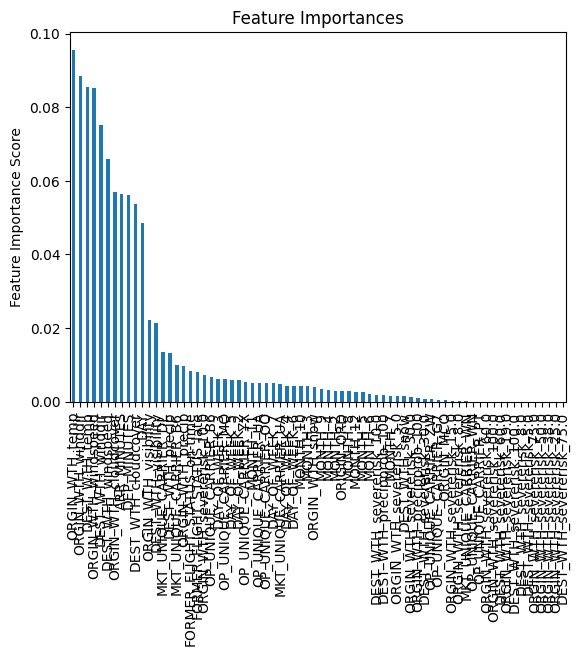

<Figure size 2000x1000 with 0 Axes>

In [145]:
X_train.columns
gb = GradientBoostingClassifier(random_state=50, min_samples_split = 2, min_samples_leaf = 6, max_depth = 7, n_estimators = 200)
gb = gb.fit(X_train, y_train) 
gb.score(X_train, y_train) 

# gb.feature_importances_
feat_imp = pd.Series(gb.feature_importances_, X_train.columns.values).sort_values(ascending=False)

feat_imp_table = pd.DataFrame(feat_imp)
feat_imp_table = feat_imp_table.reset_index()
feat_imp_table.columns = ['Features', 'Values']
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.figure(figsize=[40,20], dpi = 50)
feat_imp.head(20)

test_output = pd.DataFrame(gb.predict(X_test), index = X_test.index, columns = ['pred_Y'])

test_output.head()
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
print('Fraction of correct classification ')
gb.score(X_test, y_test) 

Random Forest

In [146]:
rf = RandomForestClassifier(max_features='sqrt', min_samples_leaf=4)
rf = rf.fit(X_train, y_train)
rf.score(X_train, y_train)

feat_imp = pd.Series(rf.feature_importances_, X_train.columns.values).sort_values(ascending=False)
feat_imp.head(20)

test_output = pd.DataFrame(rf.predict(X_test), index = X_test.index, columns = ['pred_Y'])

test_output.head()
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
print('Fraction of correct classification ')
rf.score(X_test, y_test) 

0.8306472919418758

DEST_WTH_temp                  0.07
ORGIN_WTH_temp                 0.07
ORGIN_WTH_windspeed            0.07
ARR_MINUTES                    0.07
DEST_WTH_winddir               0.06
DEP_MINUTES                    0.06
ORGIN_WTH_winddir              0.06
ORGIN_WTH_cloudcover           0.06
DEST_WTH_windspeed             0.06
DAY                            0.06
DEST_WTH_cloudcover            0.05
DEST_WTH_visibility            0.02
ORGIN_WTH_visibility           0.02
OP_UNIQUE_CARRIER_B6           0.02
MKT_UNIQUE_CARRIER_DL          0.02
ORGIN_WTH_precip               0.01
DEST_WTH_precip                0.01
MKT_UNIQUE_CARRIER_B6          0.01
FORMER_FLIGHT_STATUS_late      0.01
FORMER_FLIGHT_STATUS_on-time   0.01
dtype: float64

,pred_Y
181,late
6315,early
5949,late
4935,early
2570,early


,pred_Y,ARR_DELAY
181,late,early
6315,early,on-time
5949,late,early
4935,early,early
2570,early,on-time


Fraction of correct classification 


0.5300950369588173